In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Load and normalize dataset

In [ ]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.cifar100.load_data()

X_train = X_train.astype(np.float32) / 255.0
X_test = X_test.astype(np.float32) / 255.0

# Construct model + Hyperparameters tunning

In [ ]:
from keras import Input, Model
from keras.layers import Conv2D, BatchNormalization, Activation, Flatten, Dense, MaxPooling2D, Add
from keras.losses import CategoricalCrossentropy

In [ ]:
INPUT_SHAPE = (32, 32, 3)
N_CLASSES = 100
BATCH_SIZE = 256
N_EPOCHS = 30

**$\bullet$ Model 1: primitive**

In [ ]:
input_tensor = Input(INPUT_SHAPE)

x = Conv2D(16, 3, padding='same', activation='sigmoid')(input_tensor)
x = Conv2D(32, 3, padding='same', activation='sigmoid')(x)
x = MaxPooling2D()(x)

x = Conv2D(64, 3, padding='same', activation='sigmoid')(x)
x = Conv2D(128, 3, padding='same', activation='sigmoid')(x)
x = Conv2D(128, 3, padding='valid', activation='sigmoid')(x)
x = MaxPooling2D()(x)

x = Conv2D(256, 3, padding='valid', activation='sigmoid')(x)
x = MaxPooling2D()(x)

x = Flatten()(x)
x = Dense(512, activation='sigmoid')(x)
x = Dense(N_CLASSES, activation='softmax')(x)

model1 = keras.Model(inputs=[input_tensor], outputs=[x])

model1.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

model1.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 14, 14, 128)       1475

In [ ]:
history1 = model1.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCHS, validation_split=0.2)
model1.evaluate(X_test, Y_test, batch_size=BATCH_SIZE, verbose=0)

Epoch 1/30
157/157 [==============================] - 7s 40ms/step - loss: 4.6636 - accuracy: 0.0106 - val_loss: 4.6092 - val_accuracy: 0.0105
Epoch 2/30
157/157 [==============================] - 6s 40ms/step - loss: 4.6078 - accuracy: 0.0107 - val_loss: 4.6062 - val_accuracy: 0.0090
Epoch 3/30
157/157 [==============================] - 6s 39ms/step - loss: 4.6053 - accuracy: 0.0104 - val_loss: 4.6064 - val_accuracy: 0.0083
Epoch 4/30
157/157 [==============================] - 6s 39ms/step - loss: 4.6052 - accuracy: 0.0109 - val_loss: 4.6066 - val_accuracy: 0.0077
Epoch 5/30
157/157 [==============================] - 6s 39ms/step - loss: 4.6051 - accuracy: 0.0108 - val_loss: 4.6069 - val_accuracy: 0.0077
Epoch 6/30
157/157 [==============================] - 6s 39ms/step - loss: 4.6052 - accuracy: 0.0096 - val_loss: 4.6070 - val_accuracy: 0.0084
Epoch 7/30
157/157 [==============================] - 6s 39ms/step - loss: 4.6050 - accuracy: 0.0113 - val_loss: 4.6072 - val_accuracy: 0.0077

[4.6054792404174805, 0.009999999776482582]

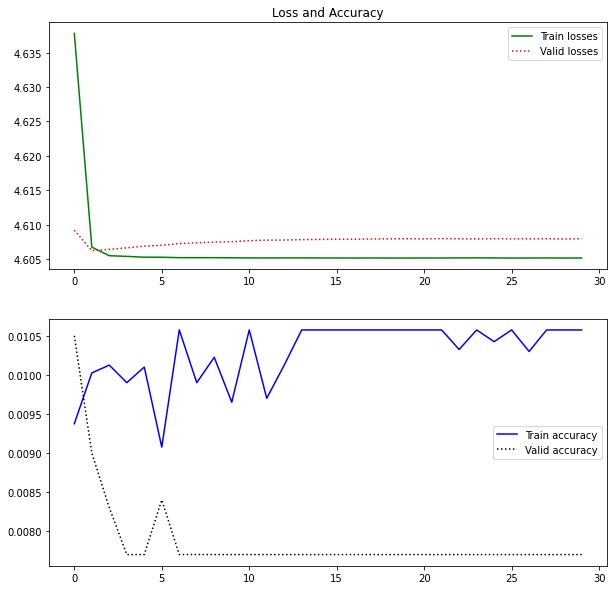

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

axes[0].set_title('Loss and Accuracy')
axes[0].plot(history1.history['loss'], '-g', label='Train losses')
axes[0].plot(history1.history['val_loss'], ':r', label='Valid losses')
axes[0].legend()
axes[1].plot(history1.history['accuracy'], '-b', label='Train accuracy')
axes[1].plot(history1.history['val_accuracy'], ':k', label='Valid accuracy')
axes[1].legend()

**Nhận xét**: model được train rất kém trên tập training (loss có giảm từ $4.66\to 4.60$) và không train được trên tập validation






**$\bullet$ Model 2: tiếp tục sử dụng hàm `sigmoid`, tuy nhiên có batch normalization**

In [ ]:
input_tensor = Input(INPUT_SHAPE)

x = Conv2D(16, 3, padding='same')(input_tensor)
x = BatchNormalization()(x)
x = Activation('sigmoid')(x)
x = Conv2D(32, 3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('sigmoid')(x)
x = MaxPooling2D()(x)

x = Conv2D(64, 3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('sigmoid')(x)
x = Conv2D(128, 3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('sigmoid')(x)
x = Conv2D(128, 3, padding='valid')(x)
x = BatchNormalization()(x)
x = Activation('sigmoid')(x)
x = MaxPooling2D()(x)

x = Conv2D(256, 3, padding='valid')(x)
x = BatchNormalization()(x)
x = Activation('sigmoid')(x)
x = MaxPooling2D()(x)

x = Flatten()(x)
x = Dense(512)(x)
x = BatchNormalization()(x)
x = Activation('sigmoid')(x)
x = Dense(N_CLASSES, activation='softmax')(x)

model2 = keras.Model(inputs=[input_tensor], outputs=[x])

model2.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

model2.summary()

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 16)        64        
_________________________________________________________________
activation (Activation)      (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 32, 32, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0  

In [ ]:
history2 = model2.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCHS, validation_split=0.2)
model2.evaluate(X_test, Y_test, batch_size=BATCH_SIZE, verbose=0)

Epoch 1/30
157/157 [==============================] - 8s 49ms/step - loss: 4.0289 - accuracy: 0.1092 - val_loss: 5.3197 - val_accuracy: 0.0095
Epoch 2/30
157/157 [==============================] - 7s 47ms/step - loss: 3.0705 - accuracy: 0.2771 - val_loss: 5.2567 - val_accuracy: 0.0262
Epoch 3/30
157/157 [==============================] - 7s 47ms/step - loss: 2.5727 - accuracy: 0.3697 - val_loss: 5.4456 - val_accuracy: 0.0618
Epoch 4/30
157/157 [==============================] - 7s 47ms/step - loss: 2.2516 - accuracy: 0.4385 - val_loss: 3.4845 - val_accuracy: 0.1958
Epoch 5/30
157/157 [==============================] - 8s 48ms/step - loss: 1.9732 - accuracy: 0.4996 - val_loss: 4.9394 - val_accuracy: 0.0760
Epoch 6/30
157/157 [==============================] - 7s 47ms/step - loss: 1.7485 - accuracy: 0.5514 - val_loss: 5.9831 - val_accuracy: 0.0650
Epoch 7/30
157/157 [==============================] - 7s 47ms/step - loss: 1.5067 - accuracy: 0.6183 - val_loss: 3.3836 - val_accuracy: 0.2220

[4.422256946563721, 0.25459998846054077]

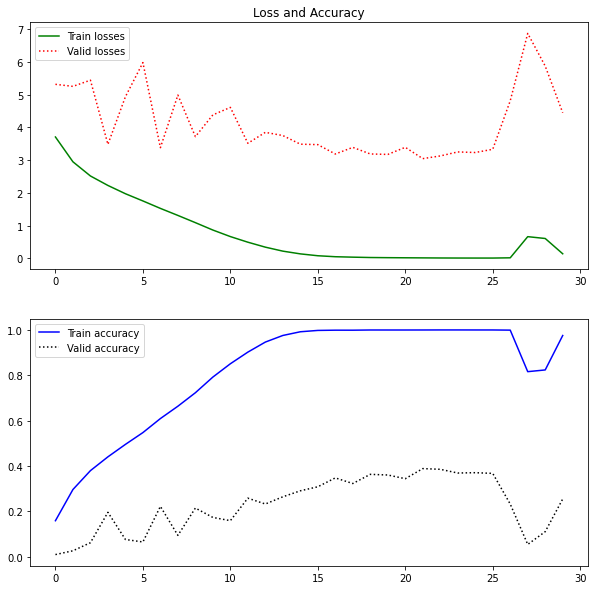

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

axes[0].set_title('Loss and Accuracy')
axes[0].plot(history2.history['loss'], '-g', label='Train losses')
axes[0].plot(history2.history['val_loss'], ':r', label='Valid losses')
axes[0].legend()
axes[1].plot(history2.history['accuracy'], '-b', label='Train accuracy')
axes[1].plot(history2.history['val_accuracy'], ':k', label='Valid accuracy')
axes[1].legend()

**Nhận xét:** Để giảm khả năng bị vanishing gradient do hàm `sigmoid` gây ra, ta dùng batch normalization trước activation với mục đích chuẩn hóa distribution của feature map trích xuất được về khoảng $(-3, 3)$, nơi có gradient $\frac{\partial\mathbf{L}}{\partial\Theta}\neq0$. Ta thấy, mô hình có vẻ "được train", tuy nhiên, còn khá yếu.

**$\bullet$ Model 3: sử dụng hàm `relu`**

In [ ]:
input_tensor = Input(INPUT_SHAPE)

x = Conv2D(16, 3, padding='same')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(32, 3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D()(x)

x = Conv2D(64, 3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(128, 3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(128, 3, padding='valid')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D()(x)

x = Conv2D(256, 3, padding='valid')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D()(x)

x = Flatten()(x)
x = Dense(512)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dense(N_CLASSES, activation='softmax')(x)

model3 = keras.Model(inputs=[input_tensor], outputs=[x])

model3.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

model3.summary()

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_88 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 16)        64        
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_89 (Conv2D)           (None, 32, 32, 32)        4640      
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 32)        0  

In [ ]:
history3 = model3.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCHS, validation_split=0.2)
model3.evaluate(X_test, Y_test, batch_size=BATCH_SIZE, verbose=0)

Epoch 1/30
157/157 [==============================] - 8s 49ms/step - loss: 3.7490 - accuracy: 0.1462 - val_loss: 5.9468 - val_accuracy: 0.0128
Epoch 2/30
157/157 [==============================] - 7s 47ms/step - loss: 2.5261 - accuracy: 0.3557 - val_loss: 4.2018 - val_accuracy: 0.1223
Epoch 3/30
157/157 [==============================] - 7s 47ms/step - loss: 1.9494 - accuracy: 0.4897 - val_loss: 2.8882 - val_accuracy: 0.3027
Epoch 4/30
157/157 [==============================] - 7s 47ms/step - loss: 1.5489 - accuracy: 0.5875 - val_loss: 2.5967 - val_accuracy: 0.3725
Epoch 5/30
157/157 [==============================] - 7s 47ms/step - loss: 1.1922 - accuracy: 0.6833 - val_loss: 2.6239 - val_accuracy: 0.3862
Epoch 6/30
157/157 [==============================] - 7s 47ms/step - loss: 0.8571 - accuracy: 0.7771 - val_loss: 2.7002 - val_accuracy: 0.3834
Epoch 7/30
157/157 [==============================] - 7s 47ms/step - loss: 0.6010 - accuracy: 0.8513 - val_loss: 2.6128 - val_accuracy: 0.4005

[2.6756412982940674, 0.4925999939441681]

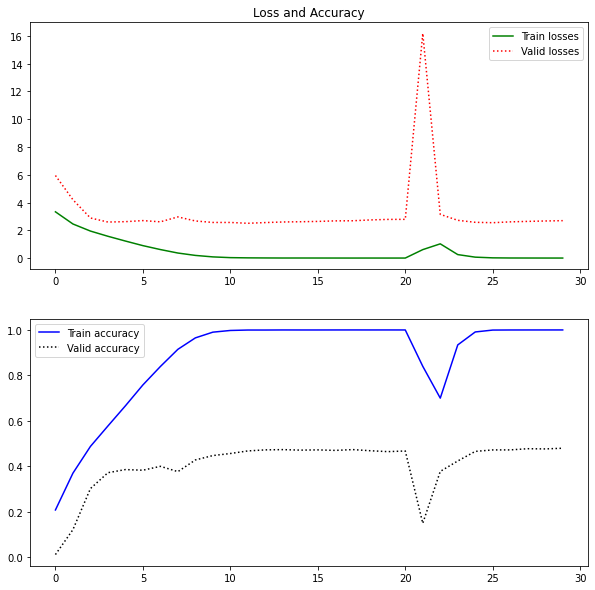

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

axes[0].set_title('Loss and Accuracy')
axes[0].plot(history3.history['loss'], '-g', label='Train losses')
axes[0].plot(history3.history['val_loss'], ':r', label='Valid losses')
axes[0].legend()
axes[1].plot(history3.history['accuracy'], '-b', label='Train accuracy')
axes[1].plot(history3.history['val_accuracy'], ':k', label='Valid accuracy')
axes[1].legend()

**Nhận xét:** Khi sử dụng `relu` cùng với batch normalization, cả tập train và valid đều cho thấy tín hiệu tốt so với model trước. Batch normalization giúp ổn định mô hình ngay cả khi đã bị overfit, tức vẫn giữ cho giá trị `val_loss` không tăng và `val_accuracy` không giảm.

**$\bullet$ Model 4: sử dụng hàm `relu` cùng với khởi tạo `He normal`**

In [ ]:
input_tensor = Input(INPUT_SHAPE)

x = Conv2D(16, 3, padding='same', kernel_initializer='he_normal')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(32, 3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D()(x)

x = Conv2D(64, 3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(128, 3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(128, 3, padding='valid')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D()(x)

x = Conv2D(256, 3, padding='valid')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D()(x)

x = Flatten()(x)
x = Dense(512, kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dense(N_CLASSES, activation='softmax')(x)

model4 = keras.Model(inputs=[input_tensor], outputs=[x])

model4.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

model4.summary()

Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_21 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_106 (Conv2D)          (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization_28 (Batc (None, 32, 32, 16)        64        
_________________________________________________________________
activation_28 (Activation)   (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_107 (Conv2D)          (None, 32, 32, 32)        4640      
_________________________________________________________________
batch_normalization_29 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
activation_29 (Activation)   (None, 32, 32, 32)        0  

In [ ]:
history4 = model4.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCHS, validation_split=0.2)
model4.evaluate(X_test, Y_test, batch_size=BATCH_SIZE, verbose=0)

Epoch 1/30
157/157 [==============================] - 9s 49ms/step - loss: 3.8070 - accuracy: 0.1404 - val_loss: 4.7802 - val_accuracy: 0.0677
Epoch 2/30
157/157 [==============================] - 7s 47ms/step - loss: 2.5715 - accuracy: 0.3542 - val_loss: 3.2739 - val_accuracy: 0.2262
Epoch 3/30
157/157 [==============================] - 7s 47ms/step - loss: 2.0185 - accuracy: 0.4736 - val_loss: 2.7867 - val_accuracy: 0.3205
Epoch 4/30
157/157 [==============================] - 7s 47ms/step - loss: 1.6004 - accuracy: 0.5783 - val_loss: 2.6014 - val_accuracy: 0.3619
Epoch 5/30
157/157 [==============================] - 7s 47ms/step - loss: 1.2247 - accuracy: 0.6734 - val_loss: 2.4773 - val_accuracy: 0.3997
Epoch 6/30
157/157 [==============================] - 7s 47ms/step - loss: 0.8749 - accuracy: 0.7754 - val_loss: 2.6457 - val_accuracy: 0.3911
Epoch 7/30
157/157 [==============================] - 7s 47ms/step - loss: 0.5769 - accuracy: 0.8600 - val_loss: 2.8195 - val_accuracy: 0.3808

[2.8676505088806152, 0.4666999876499176]

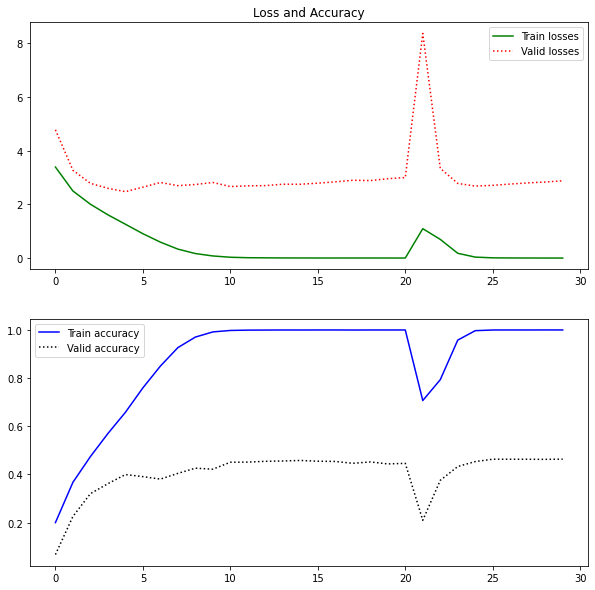

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

axes[0].set_title('Loss and Accuracy')
axes[0].plot(history4.history['loss'], '-g', label='Train losses')
axes[0].plot(history4.history['val_loss'], ':r', label='Valid losses')
axes[0].legend()
axes[1].plot(history4.history['accuracy'], '-b', label='Train accuracy')
axes[1].plot(history4.history['val_accuracy'], ':k', label='Valid accuracy')
axes[1].legend()

**Nhận xét:** Sử dụng khởi tạo `He normal` tại một số layer trong trường hợp này làm performance của model kém đi. `test_accuracy` là $46.67\%$ so với model trước là $49.26\%$, `val_loss` tăng nhẹ, sau khi bị overfit)

**$\bullet$ Model 5: Thêm layer**

In [ ]:
input_tensor = Input(INPUT_SHAPE)

x = Conv2D(16, 3, padding='same', kernel_initializer='he_normal')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(32, 3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D()(x)

x = Conv2D(64, 3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(128, 3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(256, 3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D()(x)

x = Conv2D(512, 3, padding='valid')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(512, 3, padding='valid')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(512, 3, padding='valid')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D()(x)

x = Flatten()(x)
x = Dense(512, kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dense(N_CLASSES, activation='softmax')(x)

model5 = keras.Model(inputs=[input_tensor], outputs=[x])

model5.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

model5.summary()

Model: "model_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_25 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_132 (Conv2D)          (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization_58 (Batc (None, 32, 32, 16)        64        
_________________________________________________________________
activation_58 (Activation)   (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_133 (Conv2D)          (None, 32, 32, 32)        4640      
_________________________________________________________________
batch_normalization_59 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
activation_59 (Activation)   (None, 32, 32, 32)        0  

In [ ]:
history5 = model5.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCHS, validation_split=0.2)
model5.evaluate(X_test, Y_test, batch_size=BATCH_SIZE, verbose=0)

Epoch 1/30
157/157 [==============================] - 18s 99ms/step - loss: 3.7963 - accuracy: 0.1364 - val_loss: 5.6941 - val_accuracy: 0.0363
Epoch 2/30
157/157 [==============================] - 15s 94ms/step - loss: 2.6370 - accuracy: 0.3277 - val_loss: 2.9335 - val_accuracy: 0.2851
Epoch 3/30
157/157 [==============================] - 15s 94ms/step - loss: 2.0180 - accuracy: 0.4606 - val_loss: 2.8860 - val_accuracy: 0.3283
Epoch 4/30
157/157 [==============================] - 15s 94ms/step - loss: 1.5680 - accuracy: 0.5710 - val_loss: 2.3868 - val_accuracy: 0.4082
Epoch 5/30
157/157 [==============================] - 15s 94ms/step - loss: 1.1903 - accuracy: 0.6705 - val_loss: 2.8154 - val_accuracy: 0.3607
Epoch 6/30
157/157 [==============================] - 15s 95ms/step - loss: 0.8284 - accuracy: 0.7714 - val_loss: 2.7680 - val_accuracy: 0.3858
Epoch 7/30
157/157 [==============================] - 15s 95ms/step - loss: 0.4860 - accuracy: 0.8726 - val_loss: 2.5015 - val_accuracy:

[2.1116983890533447, 0.5486000180244446]

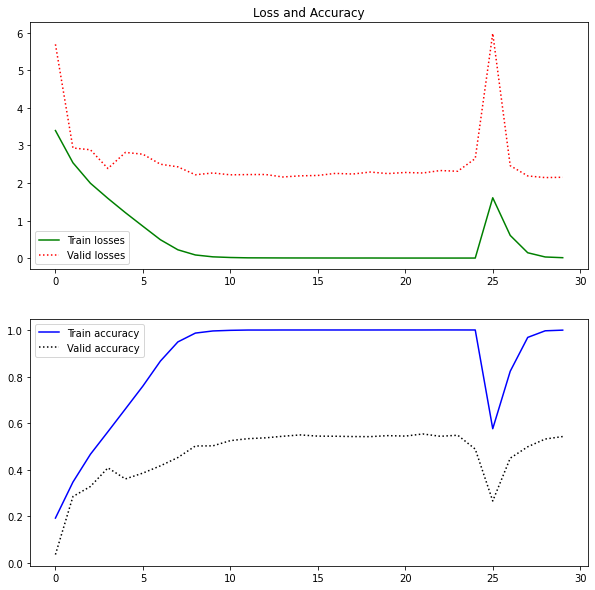

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

axes[0].set_title('Loss and Accuracy')
axes[0].plot(history5.history['loss'], '-g', label='Train losses')
axes[0].plot(history5.history['val_loss'], ':r', label='Valid losses')
axes[0].legend()
axes[1].plot(history5.history['accuracy'], '-b', label='Train accuracy')
axes[1].plot(history5.history['val_accuracy'], ':k', label='Valid accuracy')
axes[1].legend()

**Nhận xét:** Model được train tốt hơn, thể hiện trên cả tập training và validation.

**$\bullet$ Model 6: Tiếp tục thêm layer**

In [ ]:
input_tensor = Input(INPUT_SHAPE)

# x_res = Conv2D(32, 1, padding='same')(input_tensor)
x = Conv2D(16, 3, padding='same', kernel_initializer='he_normal')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(32, 3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
# x = Add()([x_res, x])

x = MaxPooling2D()(x)

# x_res = x
# x_res = Conv2D(256, 1, padding='same')(x_res)
x = Conv2D(64, 3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(128, 3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(256, 3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
# x = Add()([x_res, x])

x = MaxPooling2D()(x)

# x_res = x
# x_res = Conv2D(512, 1, padding='same')(x_res)
x = Conv2D(512, 3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(512, 3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(512, 3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
# x = Add()([x_res, x])

x = MaxPooling2D()(x)

x = Flatten()(x)
x = Dense(512, kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dense(N_CLASSES, activation='softmax')(x)

model6 = keras.Model(inputs=[input_tensor], outputs=[x])

model6.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

model6.summary()

Model: "model_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_27 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_151 (Conv2D)          (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization_76 (Batc (None, 32, 32, 16)        64        
_________________________________________________________________
activation_76 (Activation)   (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_152 (Conv2D)          (None, 32, 32, 32)        4640      
_________________________________________________________________
batch_normalization_77 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
activation_77 (Activation)   (None, 32, 32, 32)        0  

In [ ]:
history6 = model6.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCHS, validation_split=0.2)
model6.evaluate(X_test, Y_test, batch_size=BATCH_SIZE, verbose=0)

Epoch 1/30
157/157 [==============================] - 22s 132ms/step - loss: 3.6795 - accuracy: 0.1584 - val_loss: 4.8233 - val_accuracy: 0.0805
Epoch 2/30
157/157 [==============================] - 21s 131ms/step - loss: 2.4028 - accuracy: 0.3794 - val_loss: 3.6622 - val_accuracy: 0.2301
Epoch 3/30
157/157 [==============================] - 21s 132ms/step - loss: 1.7650 - accuracy: 0.5312 - val_loss: 2.6870 - val_accuracy: 0.3562
Epoch 4/30
157/157 [==============================] - 21s 132ms/step - loss: 1.2899 - accuracy: 0.6546 - val_loss: 2.3875 - val_accuracy: 0.4153
Epoch 5/30
157/157 [==============================] - 21s 132ms/step - loss: 0.8874 - accuracy: 0.7640 - val_loss: 2.3500 - val_accuracy: 0.4135
Epoch 6/30
157/157 [==============================] - 21s 132ms/step - loss: 0.5168 - accuracy: 0.8735 - val_loss: 2.2130 - val_accuracy: 0.4609
Epoch 7/30
157/157 [==============================] - 21s 132ms/step - loss: 0.2251 - accuracy: 0.9579 - val_loss: 2.2630 - val_ac

[2.084077835083008, 0.5616000294685364]

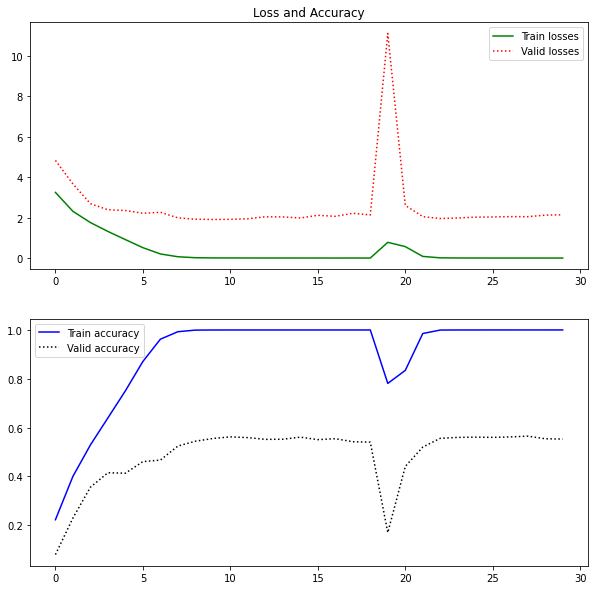

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

axes[0].set_title('Loss and Accuracy')
axes[0].plot(history6.history['loss'], '-g', label='Train losses')
axes[0].plot(history6.history['val_loss'], ':r', label='Valid losses')
axes[0].legend()
axes[1].plot(history6.history['accuracy'], '-b', label='Train accuracy')
axes[1].plot(history6.history['val_accuracy'], ':k', label='Valid accuracy')
axes[1].legend()

**$\bullet$ Model 7: Sử dụng skip-connection**

In [ ]:
input_tensor = Input(INPUT_SHAPE)

x_res = Conv2D(32, 1, padding='same')(input_tensor)
x = Conv2D(16, 3, padding='same', kernel_initializer='he_normal')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(32, 3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Add()([x_res, x])

x = MaxPooling2D()(x)

x_res = x
x_res = Conv2D(256, 1, padding='same')(x_res)
x = Conv2D(64, 3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(128, 3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(256, 3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Add()([x_res, x])

x = MaxPooling2D()(x)

x_res = x
x_res = Conv2D(512, 1, padding='same')(x_res)
x = Conv2D(512, 3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(512, 3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(512, 3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Add()([x_res, x])

x = MaxPooling2D()(x)

x = Flatten()(x)
x = Dense(512, kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dense(N_CLASSES, activation='softmax')(x)

model7 = keras.Model(inputs=[input_tensor], outputs=[x])

model7.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

model7.summary()

Model: "model_23"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_28 (InputLayer)           [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_160 (Conv2D)             (None, 32, 32, 16)   448         input_28[0][0]                   
__________________________________________________________________________________________________
batch_normalization_85 (BatchNo (None, 32, 32, 16)   64          conv2d_160[0][0]                 
__________________________________________________________________________________________________
activation_85 (Activation)      (None, 32, 32, 16)   0           batch_normalization_85[0][0]     
___________________________________________________________________________________________

In [ ]:
history7 = model7.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCHS, validation_split=0.2)
model7.evaluate(X_test, Y_test, batch_size=BATCH_SIZE, verbose=0)

Epoch 1/30
157/157 [==============================] - 24s 146ms/step - loss: 3.6160 - accuracy: 0.1772 - val_loss: 5.1671 - val_accuracy: 0.0361
Epoch 2/30
157/157 [==============================] - 23s 145ms/step - loss: 2.1428 - accuracy: 0.4421 - val_loss: 3.6519 - val_accuracy: 0.2048
Epoch 3/30
157/157 [==============================] - 23s 146ms/step - loss: 1.4305 - accuracy: 0.6269 - val_loss: 2.7378 - val_accuracy: 0.3443
Epoch 4/30
157/157 [==============================] - 23s 147ms/step - loss: 0.7998 - accuracy: 0.8084 - val_loss: 2.9516 - val_accuracy: 0.3509
Epoch 5/30
157/157 [==============================] - 23s 148ms/step - loss: 0.3402 - accuracy: 0.9354 - val_loss: 2.5782 - val_accuracy: 0.4048
Epoch 6/30
157/157 [==============================] - 23s 148ms/step - loss: 0.0955 - accuracy: 0.9890 - val_loss: 2.3281 - val_accuracy: 0.4538
Epoch 7/30
157/157 [==============================] - 23s 149ms/step - loss: 0.0237 - accuracy: 0.9986 - val_loss: 2.1382 - val_ac

[2.4527082443237305, 0.5115000009536743]

**Nhận xét:** Model khi không sự dụng skip-connection được train tốt hơn trên cả tập training và validation. 

Khi sử dụng skip-connection với Convolution $1\times1$, model lại kém đi. Có thể giải thích là do mạng chưa đủ sâu tới mức cần sử dụng tới skip-connection. Trong trường hợp gradient trên đường chính nhỏ hơn nhiều so với gradient trên đường `residual`, model khi đó sẽ được học chủ yếu từ các đường `residual` xuyên suốt mạng, điều này sẽ thể hiện tốt đối với các mạng rất sâu, hoặc có `capacity` lớn hơn `capacity` cần cho dataset; tuy nhiên, đối với trường hợp này, `capacity` của mạng chưa đủ vì ta vẫn có thể thêm tham số và model vẫn học tốt, khi model học chủ yếu qua các đường `residual`, tức mạng đã bị tắt đi một số layer, từ đó vô tình làm giảm `capacity` của mạng.